# Introduction


The objective is to create a **linear regression model** for a given dataset( House Sales in King County, USA). The overall idea of regression is to examine two things: (1) does a set of predictor variables do a good job in predicting an outcome (dependent) variable?  (2) Which variables in particular are significant predictors of the outcome variable, and in what way do they–indicated by the magnitude and sign of the beta estimates–impact the outcome variable?  These regression estimates are used to explain the relationship between one dependent variable and one or more independent variables.

**Linear Regression Analysis** consists of more than just fitting a linear line through a cloud of data points.  It consists of 3 stages – (1) analyzing the correlation and directionality of the data, (2) estimating the model, i.e., fitting the line, and (3) evaluating the validity and usefulness of the model.

## Regressions Performed


**Simple Linear Regression:** <br>
<br>
1) 'bedrooms' vs 'price'<br>
2) 'grade' vs 'price'<br>
                         
**Multiple Regression:** <br><br>
1) 'bedrooms','grade', 'sqft_living', 'sqft_above'<br>
2) 'bedrooms','bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'grade',                                     'sqft_above', 'sqft_basement', 'lat', 'sqft_living15'

**Polynomial Regression:**<br>
<br> 1) degree=2<br>
2) degree=3


# Data

## Description

In this dataset we have to predict the **sales price of houses in King County, Seattle**. It includes homes sold between May 2014 and May 2015. Before doing anything we should first know about the dataset what it contains what are its features and what is the structure of data.

The dataset cantains 20 house features plus the price, along with 21613 observations.

The description for the 20 features is given below:

1. id :- It is the unique numeric number assigned to each house being sold.
2. date :- It is the date on which the house was sold out.
3. price:- It is the price of house which we have to predict so this is our target variable and aprat from it are our features.
4. bedrooms :- It determines number of bedrooms in a house.
5. bathrooms :- It determines number of bathrooms in a bedroom of a house.
6. sqft_living :- It is the measurement variable which determines the measurement of house in square foot.
7. sqft_lot : It is also the measurement variable which determines square foot of the lot.
8. floors: It determines total floors means levels of house.
9. waterfront : This feature determines whether a house has a view to waterfront 0 means no 1 means yes.
10. view : This feature determines whether a house has been viewed or not 0 means no 1 means yes.
11. condition : It determines the overall condition of a house on a scale of 1 to 5.
12. grade : It determines the overall grade given to the housing unit, based on King County grading system on a scale of 1 to 11
13. sqft_above : It determines square footage of house apart from basement.
14. sqft_basement : It determines square footage of the basement of the house.
15. yr_built : It detrmines the date of building of the house.
16. yr_renovated : It detrmines year of renovation of house.
17. zipcode : It determines the zipcode of the location of the house.
18. lat : It determines the latitude of the location of the house.
19. long : It determines the longitude of the location of the house.
20. sqft_living15 : Living room area in 2015(implies-- some renovations)
21. sqft_lot15 : lotSize area in 2015(implies-- some renovations)

By observing the data, we can know that the **price is dependent on various features** like bedrooms(which is most dependent feature), bathrooms, sqft_living(second most important feature), sqft_lot, floors etc. The price is also dependent on the location of the house where it is present. The other features like waterfront, view are less dependent on the price. Of all the records, there are **no missing values, which helps us creating better model.** 

First, we **import** the required libraries like pandas, numpy, seaborn, matplotlib. Now import the **csv file.** Now we should get to know how the data is, what datatype using info function. We observe that date is in 'object' format. To know the no of rows and columns we use shape function. Describe the dataframe to know the mean, minumum, ,maximum, standard deviation, percentiles. 

Then plot graphs for visualization and then we do simple regression using 'bedrooms', multiple regression and polynomial regression. 


In [1]:
#importing numpy and pandas

import numpy as np #linear algebra
import pandas as pd #datapreprocessing, CSV file I/O
import seaborn as sns #for plotting graphs
import matplotlib.pyplot as plt

In [2]:
#import the datafile

df=pd.read_csv("kc_house_data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
#finding no of rows and columns

df.shape

(21613, 21)

In [6]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [7]:
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [8]:
df['waterfront'].value_counts()

0    21450
1      163
Name: waterfront, dtype: int64

In [9]:
df['grade'].value_counts()

7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: grade, dtype: int64

In [10]:
df['condition'].value_counts()

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

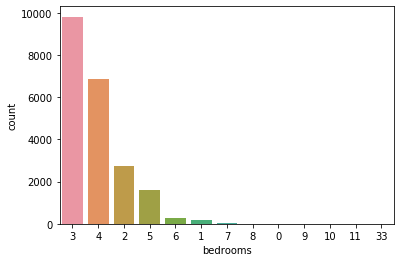

In [11]:
sns.countplot(df.bedrooms,order=df['bedrooms'].value_counts().index)

No handles with labels found to put in legend.


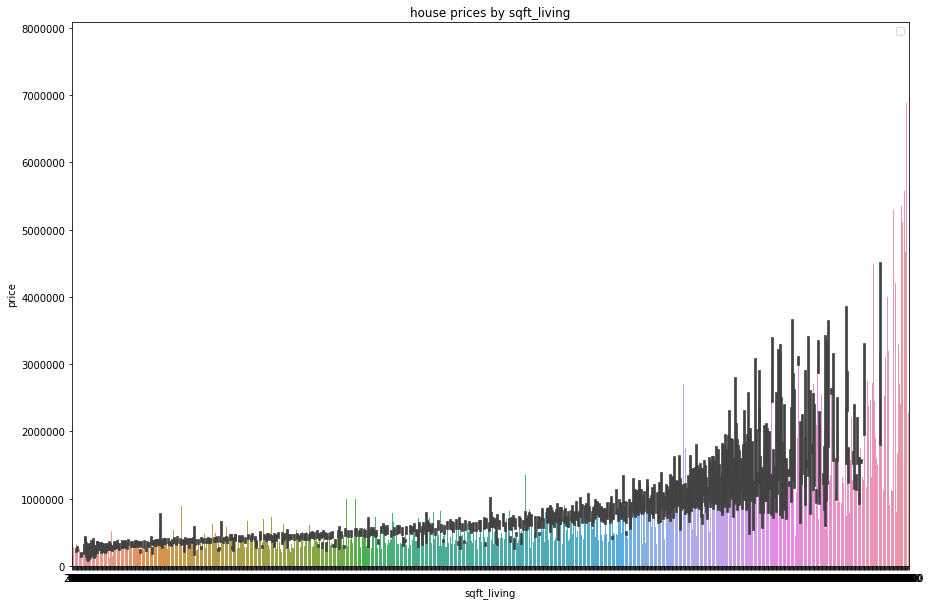

In [12]:
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(15,10))
plt.title('house prices by sqft_living')
plt.xlabel('sqft_living')
plt.ylabel('house prices')
plt.legend()
sns.barplot(x='sqft_living',y='price',data=df)


No handles with labels found to put in legend.


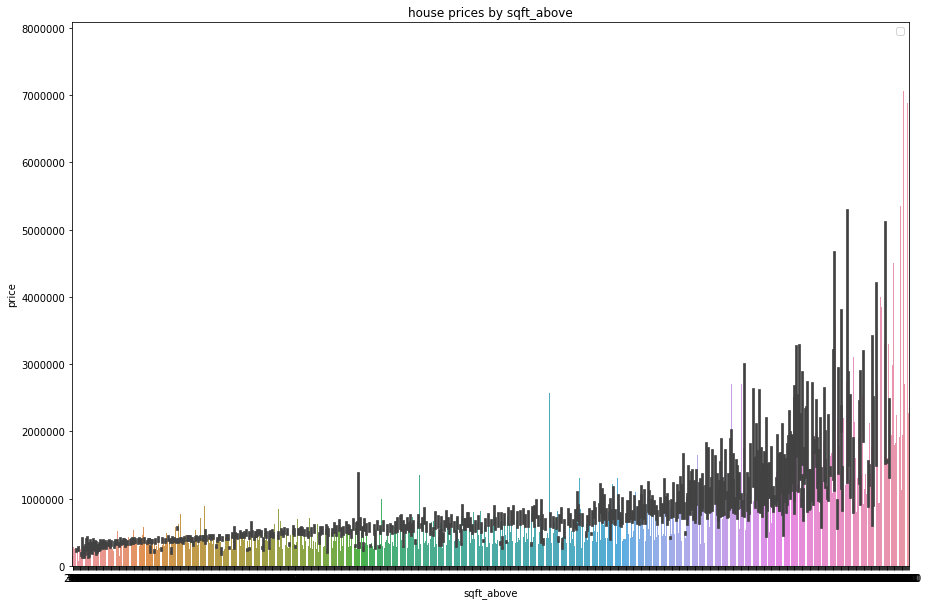

In [13]:
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(15,10))
plt.title("house prices by sqft_above")
plt.xlabel('sqft_above')
plt.ylabel('house prices')
plt.legend()
sns.barplot(x='sqft_above',y='price',data=df)

(array([1.825e+04, 3.255e+03, 1.010e+02, 5.000e+00, 2.000e+00]),
 array([  290.,  2940.,  5590.,  8240., 10890., 13540.]),
 <a list of 5 Patch objects>)

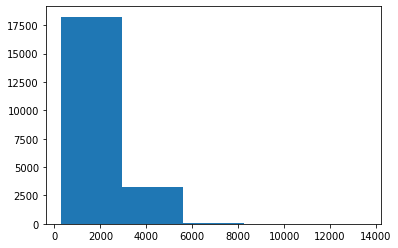

In [14]:
plt.hist('sqft_living',data=df,bins=5)

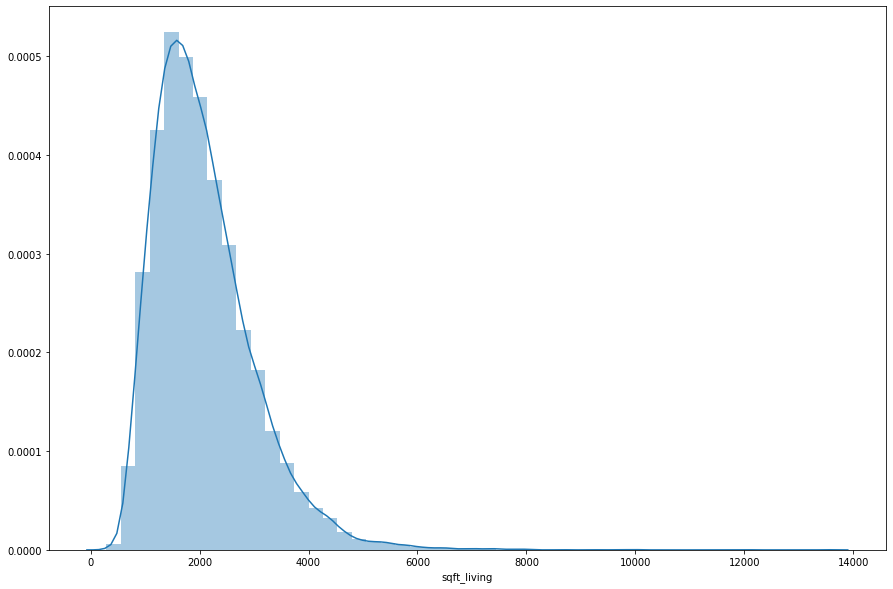

In [15]:
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(15,10))
sns.distplot(df['sqft_living'],hist=True,kde=True,rug=False,label='sqft_living',norm_hist=True)

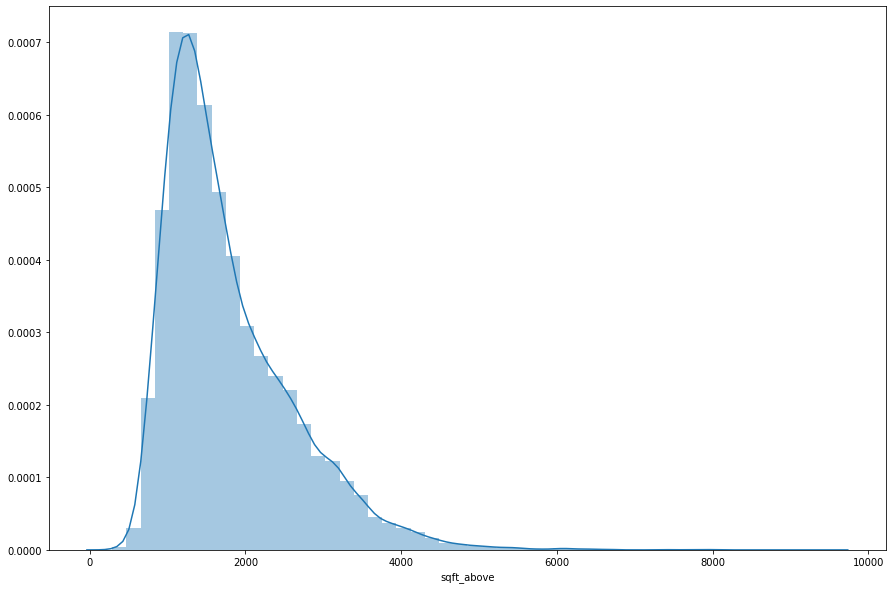

In [16]:
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(15,10))
sns.distplot(df['sqft_above'],hist=True,kde=True,rug=False,label='sqft_above',norm_hist=True)

In [17]:
print('Mean',round(df['sqft_living'].mean(),2))
print('Median',df['sqft_living'].median())
print('Mode',df['sqft_living'].mode()[0])

Mean 2079.9
Median 1910.0
Mode 1300


In [18]:
len(df[df['sqft_living']==1300])

138

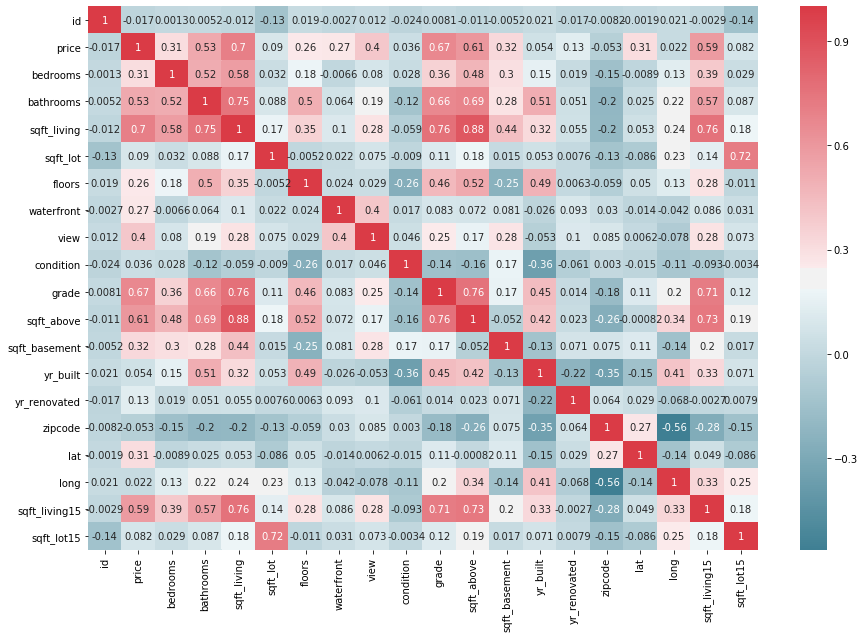

In [19]:
def correlation_heatmap(df1):
    _,ax=plt.subplots(figsize=(15,10))
    colormap=sns.diverging_palette(220,10,as_cmap=True)
    sns.heatmap(df.corr(),annot=True,cmap=colormap)
    
correlation_heatmap(df)

# Simple Linear Regression

In [20]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline


In [21]:
train_data,test_data=train_test_split(df,train_size=0.8,random_state=3)
reg=linear_model.LinearRegression()
x_train=np.array(train_data['sqft_living']).reshape(-1,1)
y_train=np.array(train_data['price']).reshape(-1,1)
reg.fit(x_train,y_train)

x_test=np.array(test_data['sqft_living']).reshape(-1,1)
y_test=np.array(test_data['price']).reshape(-1,1)
pred=reg.predict(x_test)
print('linear model')
mean_squared_error=metrics.mean_squared_error(y_test,pred)
print('Sqaured mean error', round(np.sqrt(mean_squared_error),2))
print('R squared training',round(reg.score(x_train,y_train),3))
print('R sqaured testing',round(reg.score(x_test,y_test),3) )
print('intercept',reg.intercept_)
print('coefficient',reg.coef_)

linear model
Sqaured mean error 254289.15
R squared training 0.492
R sqaured testing 0.496
intercept [-47235.8113029]
coefficient [[282.2468152]]


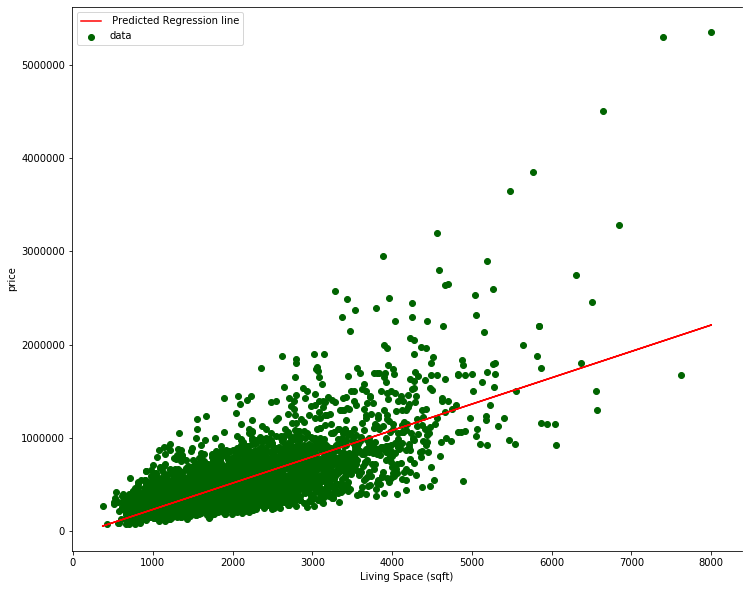

In [22]:
_, ax = plt.subplots(figsize= (12, 10))
plt.scatter(x_test, y_test, color= 'darkgreen', label = 'data')
plt.plot(x_test, reg.predict(x_test), color='red', label= ' Predicted Regression line')
plt.xlabel('Living Space (sqft)')
plt.ylabel('price')
plt.legend()
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

In [23]:
train_data,test_data=train_test_split(df,train_size=0.8,random_state=3)
reg=linear_model.LinearRegression()
x_train=np.array(train_data['grade']).reshape(-1,1)
y_train=np.array(train_data['price']).reshape(-1,1)
reg.fit(x_train,y_train)

x_test=np.array(test_data['grade']).reshape(-1,1)
y_test=np.array(test_data['price']).reshape(-1,1)
pred=reg.predict(x_test)
print('linear model')
mean_squared_error=metrics.mean_squared_error(y_test,pred)
print('squared mean error',round(np.sqrt(mean_squared_error),2))
print('R squared training',round(reg.score(x_train,y_train),3))
print('R squared testing',round(reg.score(x_test,y_test),3))
print('intercept',reg.intercept_)
print('coeeficient',reg.coef_)

linear model
squared mean error 263387.61
R squared training 0.442
R squared testing 0.46
intercept [-1061459.62144313]
coeeficient [[209225.48270386]]


# Multiple Regression

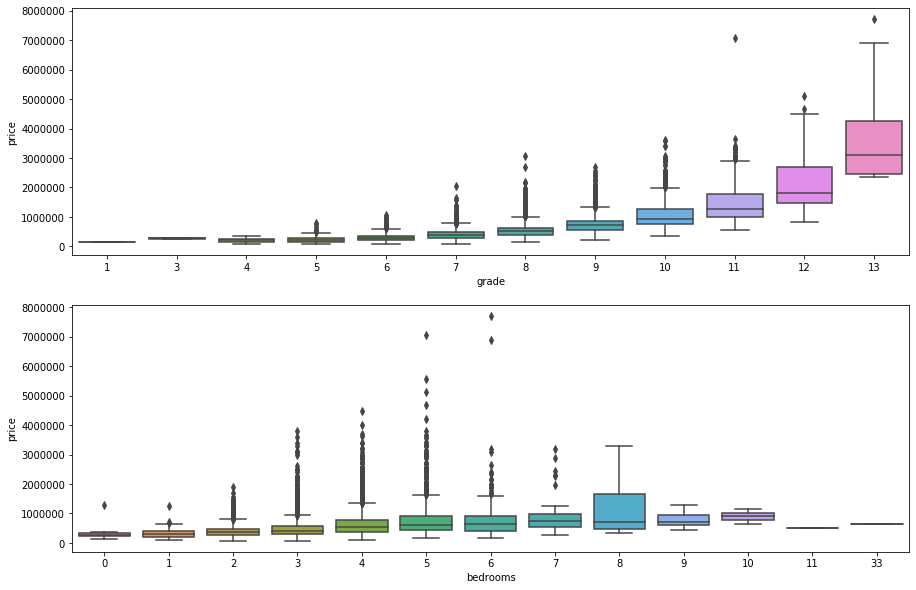

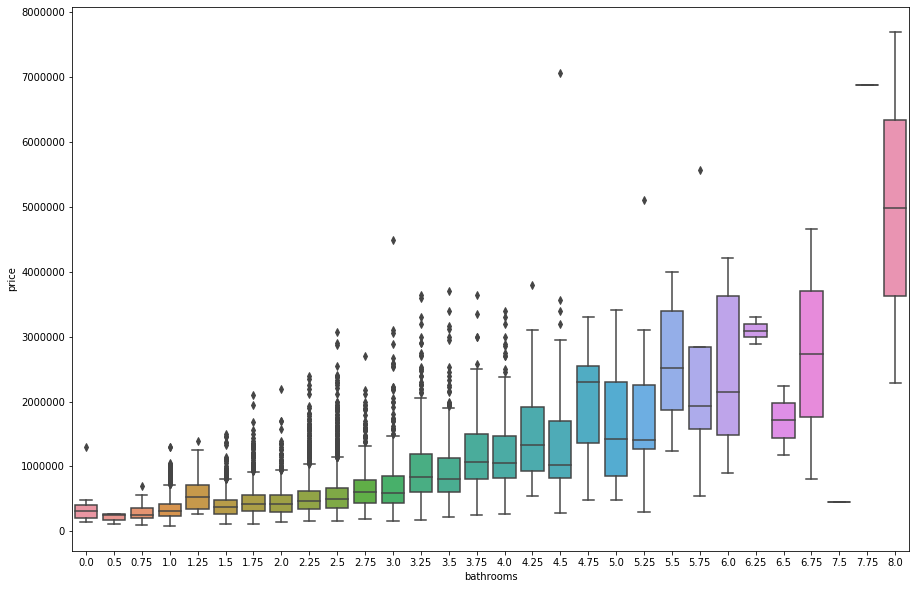

In [24]:
fig,ax=plt.subplots(2,1,figsize=(15,10))
sns.boxplot(x=train_data['grade'],y=train_data['price'],ax=ax[0])
sns.boxplot(x=train_data['bedrooms'],y=train_data['price'],ax=ax[1])
_ , axes = plt.subplots(1, 1, figsize=(15,10))
sns.boxplot(x=train_data['bathrooms'],y=train_data['price'])

In [25]:
features1=['bedrooms','grade','sqft_living','sqft_above']
reg=linear_model.LinearRegression()
reg.fit(train_data[features1],train_data['price'])
pred=reg.predict(test_data[features1])
print('complex_model 1')
mean_squared_error=metrics.mean_squared_error(y_test,pred)
print('mean squared error(MSE)', round(np.sqrt(mean_squared_error),2))
print('R squared training',round(reg.score(train_data[features1],train_data['price']),3))
print('R squared training', round(reg.score(test_data[features1],test_data['price']),3))
print('Intercept: ', reg.intercept_)
print('Coefficient:', reg.coef_)

complex_model 1
mean squared error(MSE) 239014.4
R squared training 0.548
R squared training 0.555
Intercept:  -523645.7841468266
Coefficient: [-4.33050242e+04  1.03455986e+05  2.73023590e+02 -8.38875593e+01]


In [26]:
features1 = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','grade','sqft_above','sqft_basement','lat','sqft_living15']
reg= linear_model.LinearRegression()
reg.fit(train_data[features1],train_data['price'])
pred = reg.predict(test_data[features1])
print('Complex Model_2')
mean_squared_error = metrics.mean_squared_error(y_test, pred)
print('Mean Squared Error (MSE) ', round(np.sqrt(mean_squared_error), 2))
print('R-squared (training) ', round(reg.score(train_data[features1], train_data['price']), 3))
print('R-squared (testing) ', round(reg.score(test_data[features1], test_data['price']), 3))
print('Intercept: ', reg.intercept_)
print('Coefficient:', reg.coef_)

Complex Model_2
Mean Squared Error (MSE)  205244.56
R-squared (training)  0.655
R-squared (testing)  0.672
Intercept:  -32330182.911675815
Coefficient: [-2.62100082e+04 -3.47626774e+03  1.32069090e+02 -1.31506101e-01
 -3.22608866e+04  5.65731080e+05  6.81843494e+04  8.17559446e+04
  6.62246805e+01  6.58444098e+01  6.71765072e+05  4.60648979e+00]


# Polynomial Regression

In [27]:
polyfeat=PolynomialFeatures(degree=2)
xtrain_poly=polyfeat.fit_transform(train_data[features1])
xtest_poly=polyfeat.fit_transform(test_data[features1])

poly=linear_model.LinearRegression()
poly.fit(xtrain_poly,train_data['price'])
polypred=poly.predict(xtest_poly)

print('Complex Model_3')
mean_squared_error = metrics.mean_squared_error(test_data['price'], polypred)
print('Mean Squared Error (MSE) ', round(np.sqrt(mean_squared_error), 2))
print('R-squared (training) ', round(poly.score(xtrain_poly, train_data['price']), 3))
print('R-squared (testing) ', round(poly.score(xtest_poly, test_data['price']), 3))

Complex Model_3
Mean Squared Error (MSE)  175811.82
R-squared (training)  0.758
R-squared (testing)  0.759


In [28]:
polyfeat=PolynomialFeatures(degree=3)
xtrain_poly=polyfeat.fit_transform(train_data[features1])
xtest_poly=polyfeat.fit_transform(test_data[features1])

poly=linear_model.LinearRegression()
poly.fit(xtrain_poly,train_data['price'])
polypred=poly.predict(xtest_poly)

print('complex model_4')
mean_squared_error=metrics.mean_squared_error(test_data['price'],polypred)
print('Mean Squared Error (MSE) ', round(np.sqrt(mean_squared_error), 2))
print('R-squared (training) ', round(poly.score(xtrain_poly, train_data['price']), 3))
print('R-squared (testing) ', round(poly.score(xtest_poly, test_data['price']), 3))

complex model_4
Mean Squared Error (MSE)  207502.24
R-squared (training)  0.776
R-squared (testing)  0.665


Complex Model_3 gives us R-squared (testing) score of 0.759. From above reports, we can conclude that Polynomial regression is best solution.